## Time Series Challenge
In this challenge, we will compare the various time series prediction techniques on the dataset we can find [here](https://drive.google.com/file/d/1pgZlxluv5_cbgwR5JSWu4njbYXo_06Eb/view?usp=sharing).

- moving average
- ARIMA
- Prophet
- (Stretch) LSTMs

There are several item categories in this sales dataset. You can choose your own category or predict the overall sales.

> #### Note
> We have one order in every row, thus don't forget to transform the data into a time series format first. The data can be transformed into a daily, weekly or monthly time series.

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Sample - Superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [4]:
df_office = df[df['Category']=='Office Supplies']

In [5]:
df_office.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6026 entries, 2 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         6026 non-null   int64         
 1   Order ID       6026 non-null   object        
 2   Order Date     6026 non-null   datetime64[ns]
 3   Ship Date      6026 non-null   datetime64[ns]
 4   Ship Mode      6026 non-null   object        
 5   Customer ID    6026 non-null   object        
 6   Customer Name  6026 non-null   object        
 7   Segment        6026 non-null   object        
 8   Country        6026 non-null   object        
 9   City           6026 non-null   object        
 10  State          6026 non-null   object        
 11  Postal Code    6026 non-null   int64         
 12  Region         6026 non-null   object        
 13  Product ID     6026 non-null   object        
 14  Category       6026 non-null   object        
 15  Sub-Category   6026 n

In [6]:
df_office = df_office[['Order Date', 'Sales']]
df_office.head()

,Order Date,Sales
2,2016-06-12,14.620
4,2015-10-11,22.368
6,2014-06-09,7.280
8,2014-06-09,18.504
9,2014-06-09,114.900


In [7]:
df_office.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [8]:
df = df_office.groupby('Order Date').sum('Sales')
df = pd.DataFrame(df)

In [9]:
df.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430


In [35]:
y = df.resample('M').mean()

In [37]:
y.head()

,Sales
Order Date,
2014-01-31,285.357647
2014-02-28,63.042588
2014-03-31,391.176318
2014-04-30,464.794750
2014-05-31,324.346545


In [38]:
df = y

In [39]:
def plot_timeseries(df):
    df.plot()

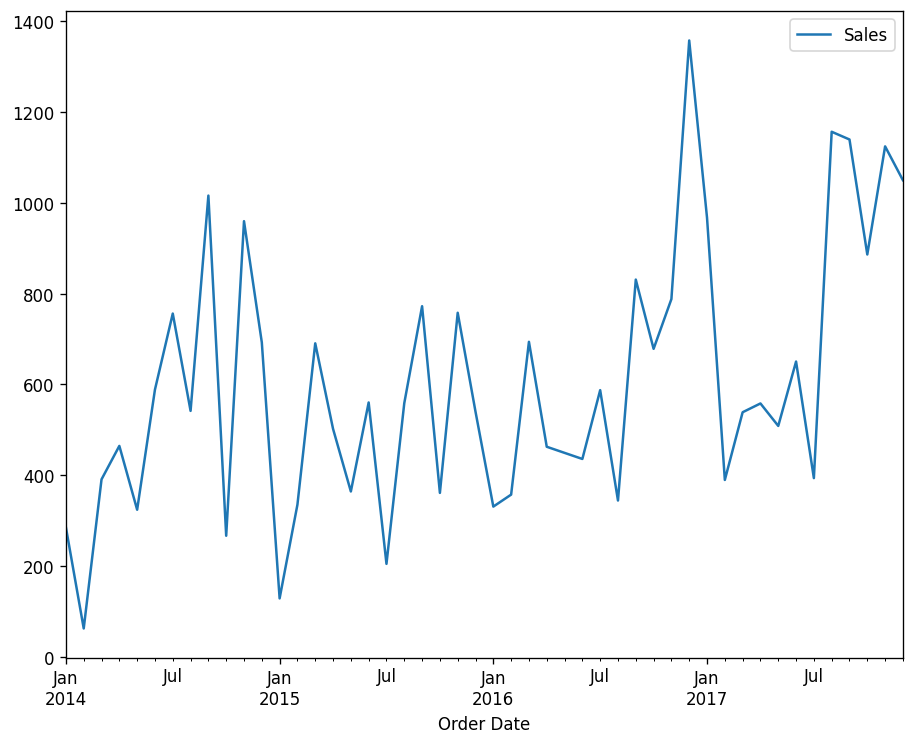

In [40]:
plot_timeseries(df)

In [70]:
def ADF_Stationarity_Test(timeseries, significance_level):
    from statsmodels.tsa.stattools import adfuller
    import pandas as pd
    timeseries = pd.DataFrame(timeseries)
    X = timeseries.values
    significance_level_trans = round(significance_level*100)
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
	    print('\t%s: %.3f' % (key, value))
    key = str(significance_level_trans)+'%'
    if result[1] <= significance_level:
        print('Based on a significance level of %s, this time series is stationary' % significance_level)
    else:
        print('Based on a significance level of %s, this time series is non-stationary' % significance_level)

In [71]:
ADF_Stationarity_Test(df, significance_level = 0.05)

ADF Statistic: -4.664633
p-value: 0.000098
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601
Based on a significance level of 0.05, this time series is stationary


array([[<AxesSubplot: title={'center': 'Sales'}>]], dtype=object)

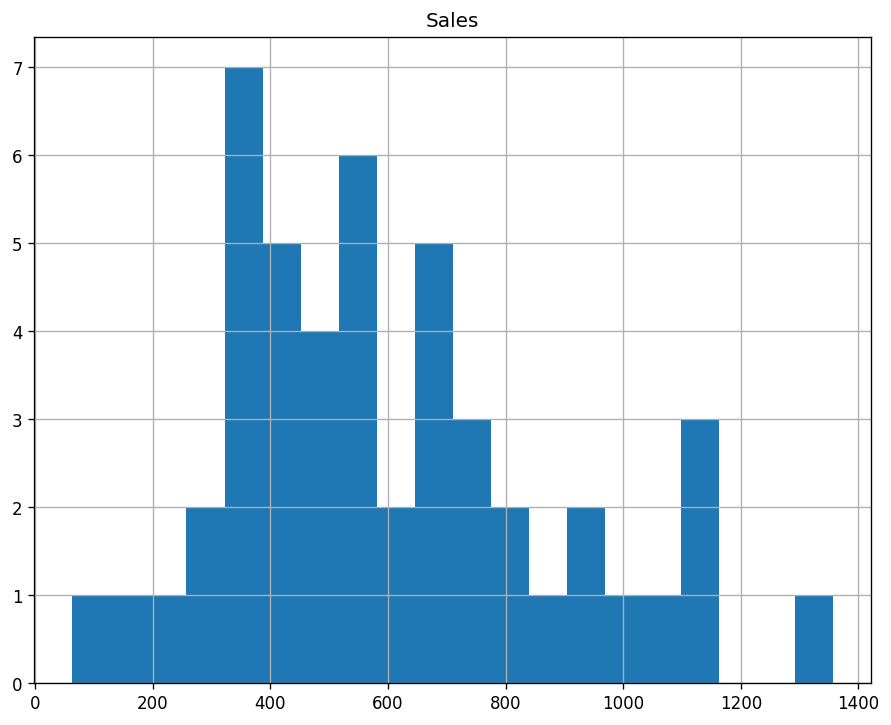

In [48]:
df.hist(bins=20)

In [49]:
X = df
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=505.340140, mean2=694.984301
variance1=60797.158761, variance2=92218.646018


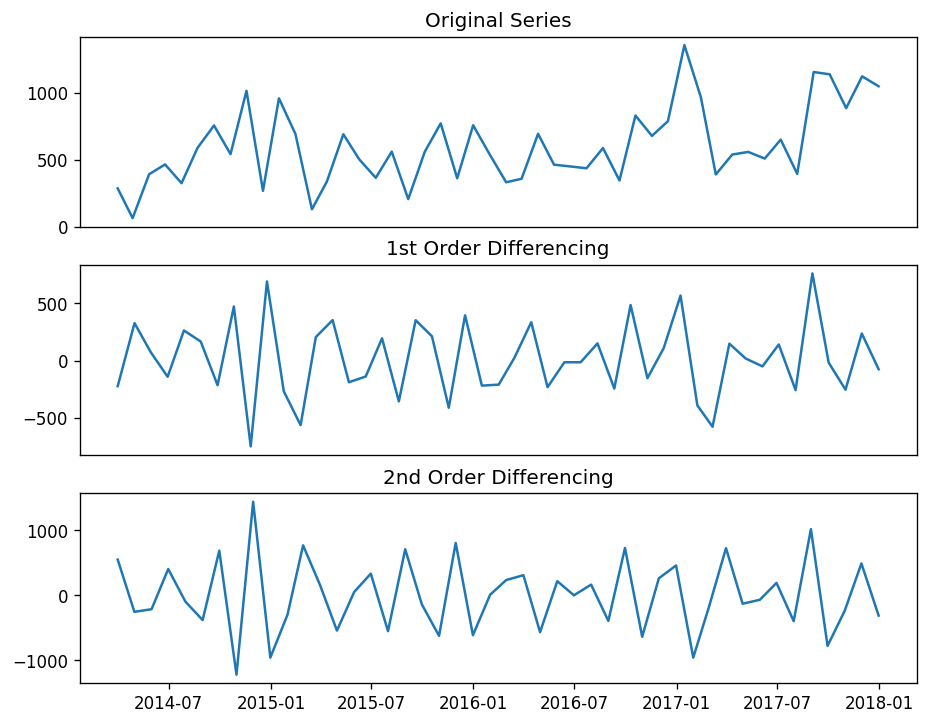

In [87]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# t = np.linspace(0,100,1000)
# x = t**2 + 0.00001*(np.random.rand(1000))

# df_new = pd.DataFrame(columns = ['time','x'])
# df_new['time'] = t
# df_new['x'] = x

# df_new = pd.DataFrame([t.reshape(-1,1).tolist(),x.reshape(-1,1).tolist()], columns = ['time','x'])



# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df.Sales); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df.Sales.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df.Sales.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

In [51]:
df_diff = df.diff().dropna()

In [52]:
ADF_Stationarity_Test(df_diff, significance_level = 0.05)

ADF Statistic: -8.603123
p-value: 0.000000
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602
Based on a significance level of 0.05, this time series is stationary


array([[<AxesSubplot: title={'center': 'Sales'}>]], dtype=object)

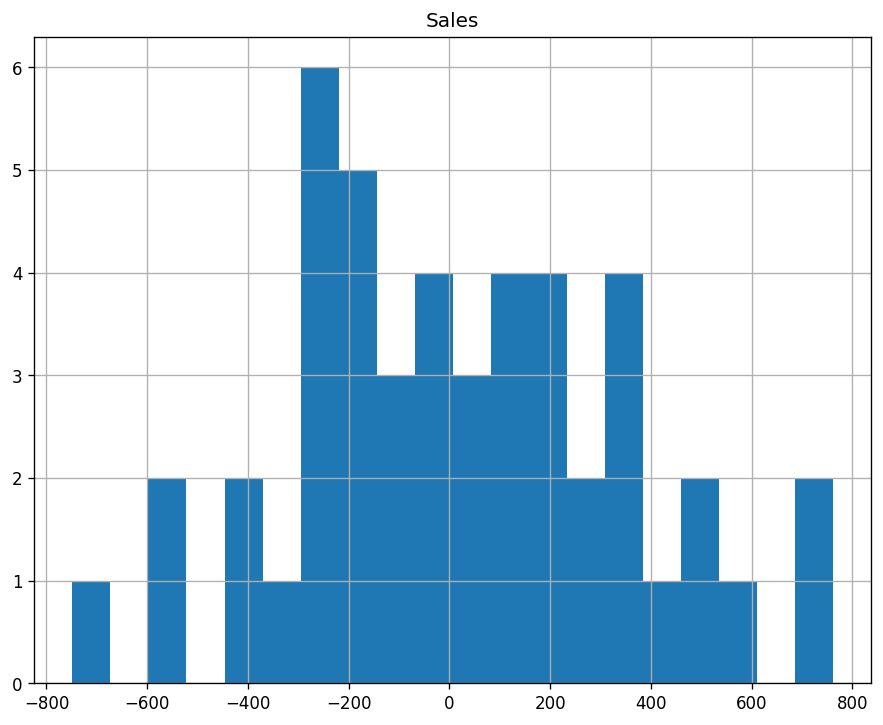

In [54]:
df_diff.hist(bins=20)

In [55]:
X = df_diff
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=1.911353, mean2=31.231287
variance1=128422.382643, variance2=96643.259006


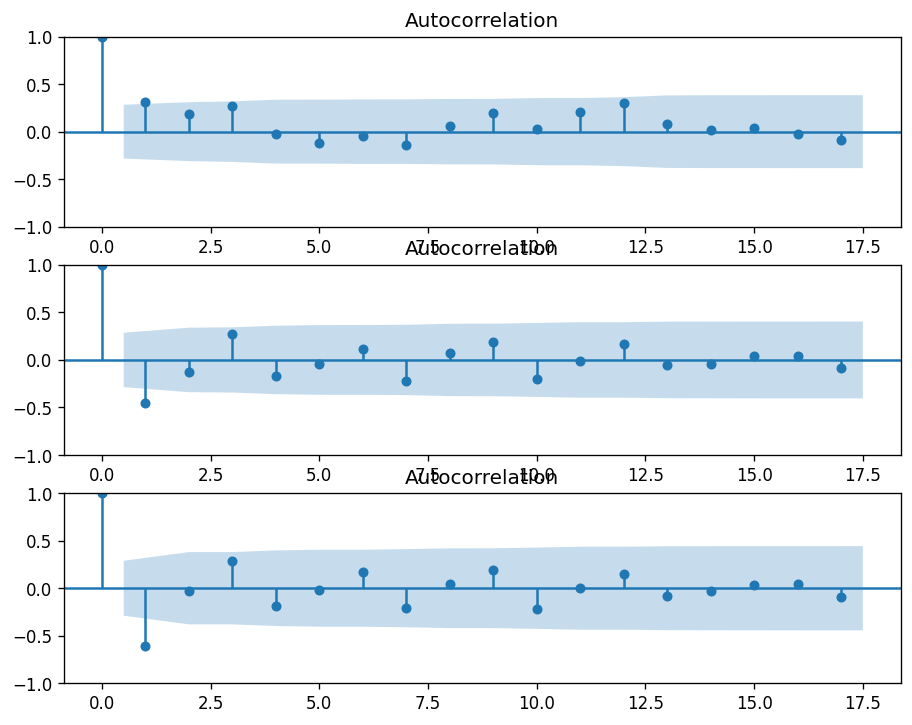

In [56]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df.Sales, ax=ax1)
plot_acf(df.Sales.diff().dropna(), ax=ax2)
plot_acf(df.Sales.diff().diff().dropna(), ax=ax3);

In [22]:
d = 1

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


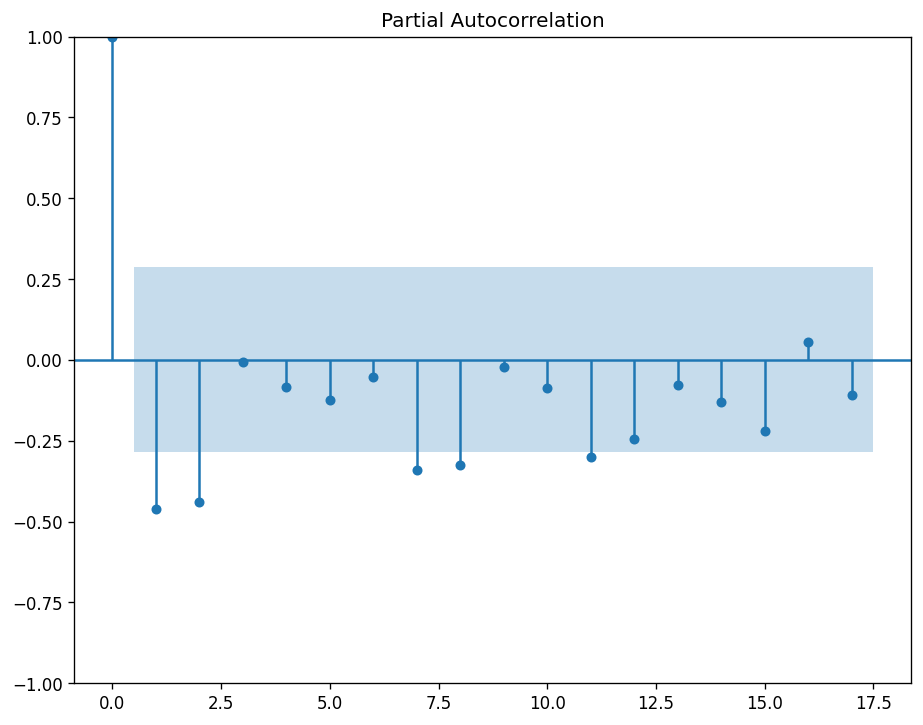

In [57]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_diff);

In [24]:
p = 2

In [25]:
# do we increase the value of p even if the pcaf is negative?

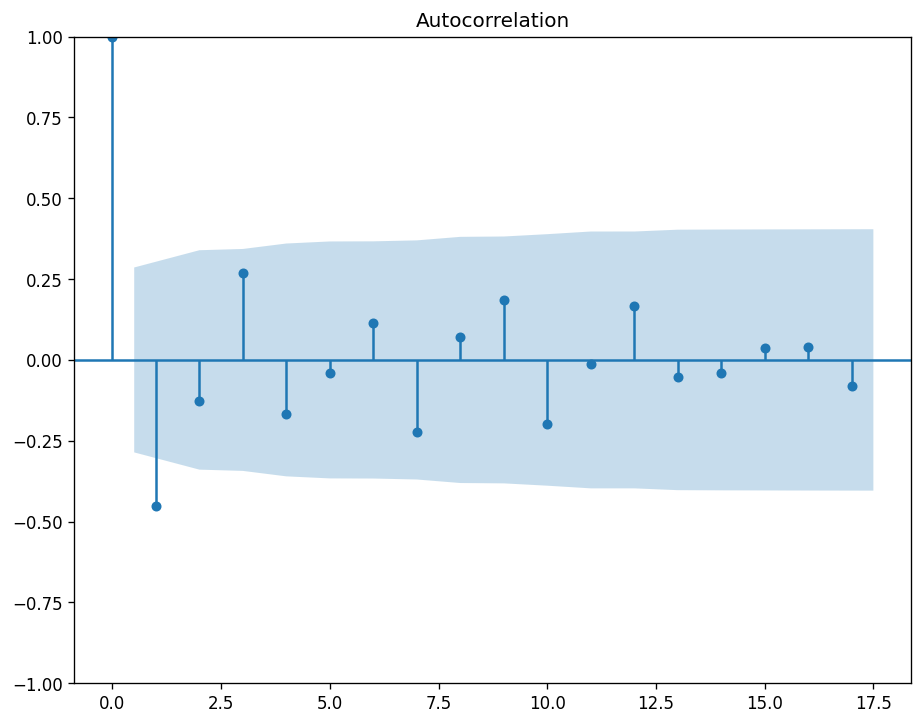

In [63]:
plot_acf(df_diff);

In [27]:
q = 2

In [64]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_diff, order = (p,d,q))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   47
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -325.448
Date:                Tue, 15 Nov 2022   AIC                            660.895
Time:                        19:17:27   BIC                            670.038
Sample:                    02-28-2014   HQIC                           664.320
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6974      0.341     -2.042      0.041      -1.367      -0.028
ar.L2         -0.4291      0.175     -2.451      0.014      -0.772      -0.086
ma.L1         -0.9068      0.420     -2.160      0.031      -1.730      -0.084
ma.L2         -0.0932      0.380     -0.245      0.806      -0.837       0.651
sigma2      7.286e+04   5.34e-06   1.36e+10      0.000    7.29e+04    7.29e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.90   Prob(JB):                         0.83
Heteroskedasticity (H):               1.16   Skew:                            -0.17
Prob(H) (two-sided):                  0.77   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.96e+26. Standard errors may be unstable.
"""

In [65]:
predictions = model_fit.predict(dynamic=False)

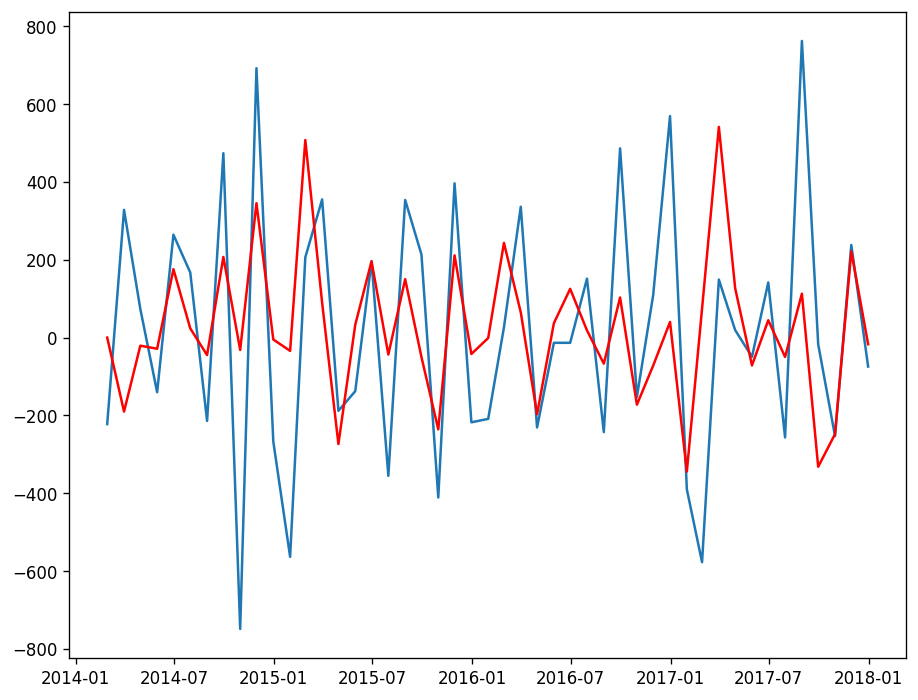

In [66]:
plt.plot(df_diff)
plt.plot(predictions, color='red')
plt.show()

In [67]:
df.values

array([[ 285.35764706],
       [  63.04258824],
       [ 391.17631818],
       [ 464.79475   ],
       [ 324.34654545],
       [ 588.77440909],
       [ 756.0604    ],
       [ 541.87914286],
       [1015.6777037 ],
       [ 267.07881481],
       [ 959.37271429],
       [ 692.55623077],
       [ 129.19857143],
       [ 335.5041875 ],
       [ 690.54552174],
       [ 502.34232   ],
       [ 364.54944   ],
       [ 560.40773684],
       [ 205.21473913],
       [ 558.81466667],
       [ 772.23068   ],
       [ 361.39208333],
       [ 757.79035714],
       [ 540.0558    ],
       [ 331.230125  ],
       [ 357.59736842],
       [ 693.87724   ],
       [ 462.93247826],
       [ 449.48972414],
       [ 436.0724    ],
       [ 587.47472727],
       [ 344.60538462],
       [ 830.84778571],
       [ 678.40808333],
       [ 787.97223077],
       [1357.05592857],
       [ 967.01313636],
       [ 389.88273684],
       [ 538.89948148],
       [ 558.2292963 ],
       [ 508.77644444],
       [ 650.463

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 359.700


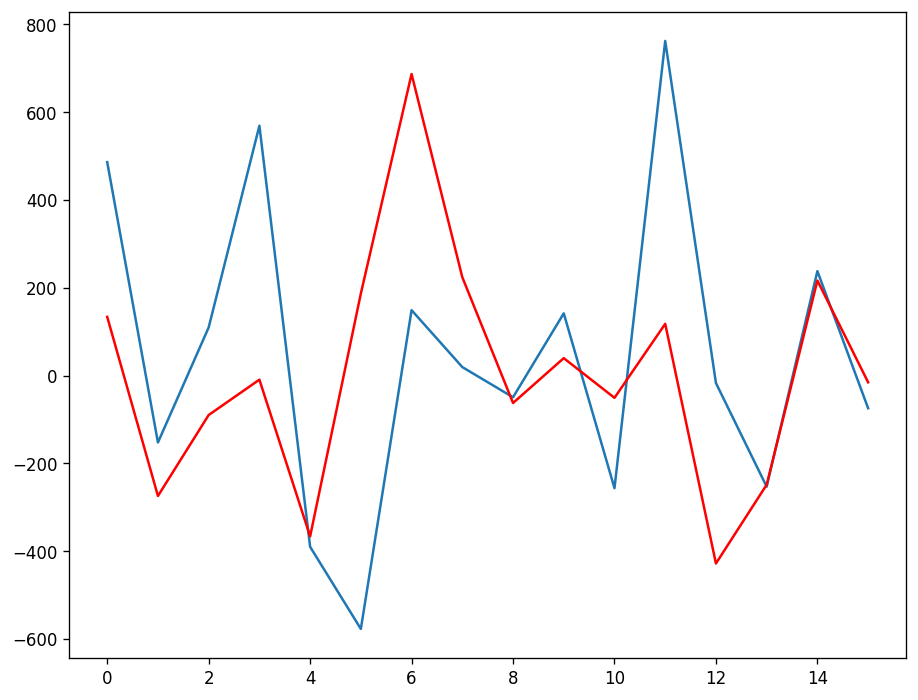

In [69]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

p = 2
d = 1
q = 2

# split into train and test sets
X = df_diff.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(p,d,q))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [89]:
df.reset_index(inplace=True)

In [93]:
df.head()

,Order Date,y
0,2014-01-31,285.357647
1,2014-02-28,63.042588
2,2014-03-31,391.176318
3,2014-04-30,464.794750
4,2014-05-31,324.346545


In [94]:
df.rename(columns={'Order Date':'ds','Sales':'y'}, inplace=True)

In [95]:
df.head()

,ds,y
0,2014-01-31,285.357647
1,2014-02-28,63.042588
2,2014-03-31,391.176318
3,2014-04-30,464.794750
4,2014-05-31,324.346545


In [96]:
df['ds'] = pd.to_datetime(df['ds'])

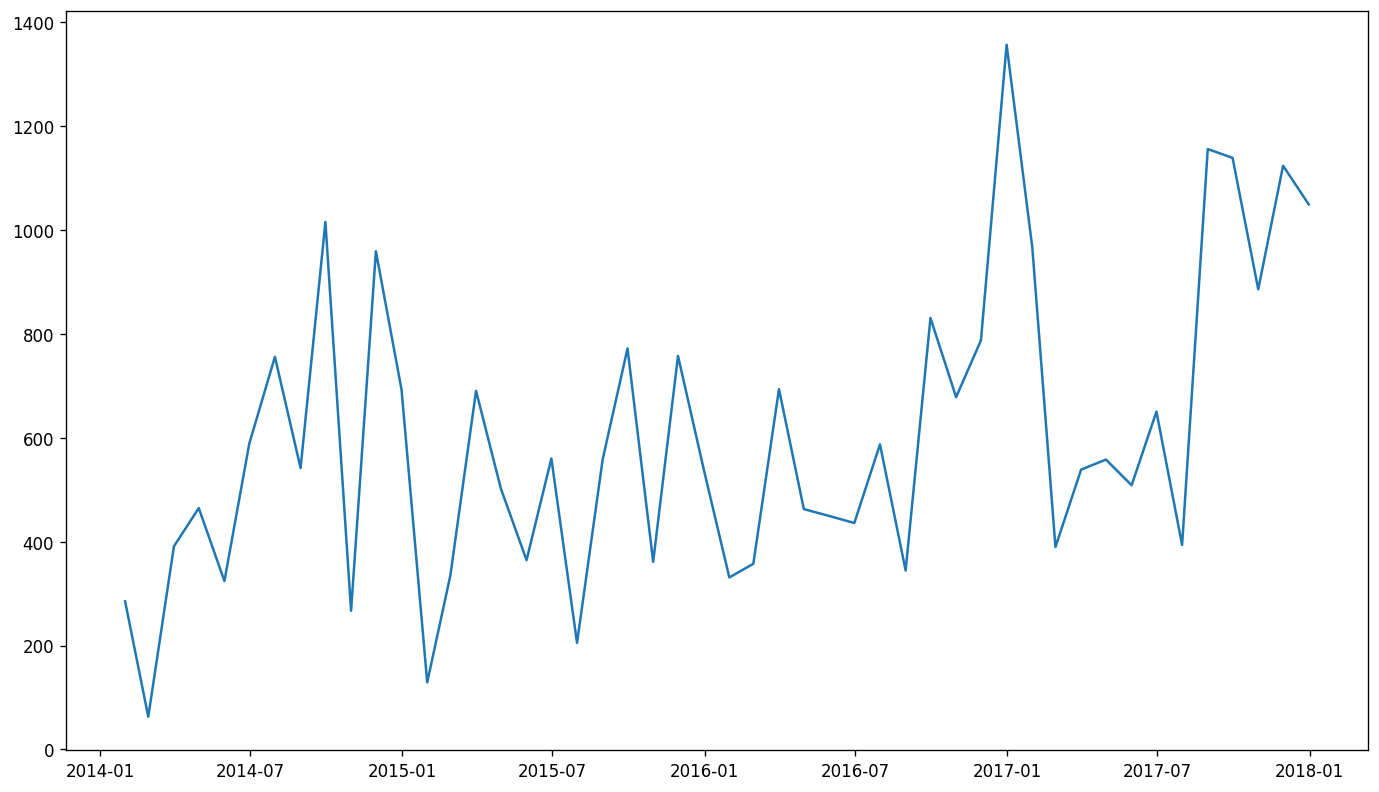

In [97]:
plt.figure(figsize = (14,8))
plt.plot(df['ds'], df['y'])
plt.show()

In [98]:
from prophet import Prophet
m = Prophet()

In [99]:
m.fit(df)

21:23:31 - cmdstanpy - INFO - Chain [1] start processing
21:23:31 - cmdstanpy - INFO - Chain [1] done processing


In [109]:
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

In [110]:
future

,ds
0,2014-01-31
1,2014-02-28
2,2014-03-31
3,2014-04-30
4,2014-05-31
5,2014-06-30
6,2014-07-31
7,2014-08-31
8,2014-09-30
9,2014-10-31


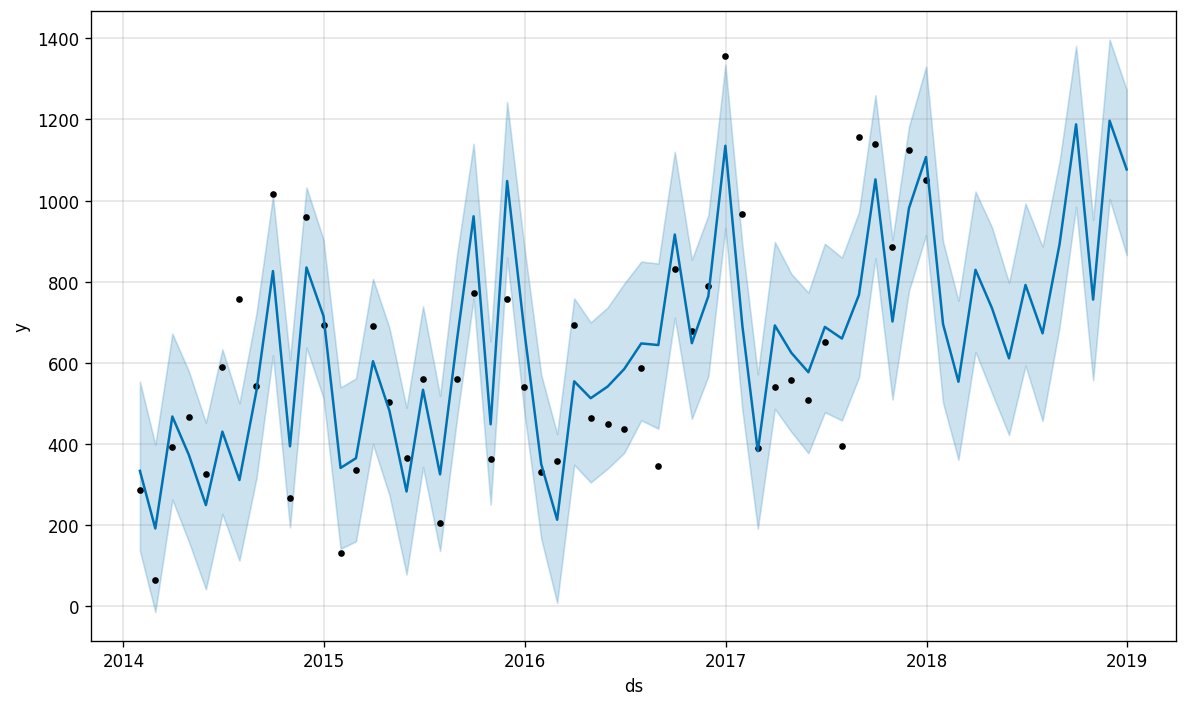

In [111]:
fig1 = m.plot(forecast)